<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2024 </h1> 
<h3 align="center">Day 3 2024 - Neuron Morphology</h3> 
<h3 align="center">Notebook 2: Morphological Features</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
   
Here we will begin quantifying the features we visualized in the previous notebook, including: 
* path-length of axons and dendrites
* distribution of branch lengths
* relationship between axon and dendrite, re: branch number and path-length.
    
</div>

In [1]:
import pandas as pd
import numpy as np
from os.path import join as pjoin
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import cloudvolume
from meshparty import skeleton
import skeleton_plot as skelplot

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
 
## Load a precomputed skeleton
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  Choose your own adventure: use either the EM or LM data path from the previous notebook. Return here later to select the other data type.
</div>

In [88]:
# Set EM data directory
em_directory = "precomputed://gs://allen_neuroglancer_ccf/Qiu2024" ## This is a placeholder!

# Initialize cloud volume
cv_em = cloudvolume.CloudVolume(em_directory, use_https=True)

# Load and example skeleton
sk_em = cv_em.skeleton.get(10001)

In [6]:
#initialize meshparty object with vertices and edges
sk = skeleton.Skeleton(sk_em.vertices, 
                       sk_em.edges, 
                       vertex_properties={'radius': sk_em.radius,
                                          'compartment': sk_em.vertex_types}, 
                       root = 0, 
                       # root = len(sk_em.edges), # when the final edge is root
                       remove_zero_length_edges = False)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
## Inspect features of the meshwork

[MeshParty](https://github.com/CAVEconnectome/MeshParty/) simplifies the process of extracting features like branches and endpoints, and calculating **path-lengths**--the distance in space traversed by the neurites.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### Branches, endpoints, and segments
    
</div>

In [102]:
# Vertices
print(f"There are {len(sk.vertices)} vertices in this neuron")

There are 1456 vertices in this neuron


In [103]:
# Branch points
print("Branch points are at the following indices: \n",sk.branch_points)

Branch points are at the following indices: 
 [   0   34   39   49  160  180  262  264  276  348  385  420  447  480
  526  569  593  614  791  885  898  972  991  998 1134 1135 1137 1154
 1286 1353 1386]


In [104]:
# End points
print("End points are at the following indices: \n",sk.end_points)

End points are at the following indices: 
 [ 101  102  167  168  263  270  271  352  353  416  448  865  866  868
  870  873  876  878  879  934  970 1027 1046 1080 1128 1185 1218 1276
 1325 1343 1385 1420 1455]


In [105]:
# Root - point associated with the root node, which is the soma
print("Root point with skeleton indices: ", sk.root.item())

Root point with skeleton indices:  0


In [106]:
# Segments - the continuous branch segments
#Branch points
print("All branch segments are: \n",sk.segments)

All branch segments are: 
 [array([0]), array([885, 884, 883, 882, 881, 880,   1]), array([1134, 1133, 1132, 1131, 1130, 1129,    2]), array([34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3]), array([39, 38, 37, 35]), array([180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169,  36]), array([160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148,
       147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135,
       134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122,
       121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109,
       108, 107, 106, 105, 104, 103,  40]), array([49, 48, 47, 46, 45, 44, 43, 42, 41]), array([101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,
        88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,
        75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,
        62,  61,  60,  59,  5

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### Calculate pathlength
    
Use the skeleton meshwork's `path_length()` function to calculate the path-length for the whole neuron
    
</div>

In [108]:
# Path-length for all neurites
full_pathlength = sk.path_length() / 1_000 # Convert to microns from nanometers by dividing by 10^3
print("Path-length of the entire neuron: ", full_pathlength, ' um')

Path length of the entire neuron:  6949.89  um


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
Use the pathlength operation on subsets of the path as well
    
</div>

In [110]:
# Path-length for arbitrary segment
segment_pathlength = sk.path_length(sk.segments[3]) / 1_000 # Convert to microns from nanometers by dividing by 10^3
print("Path-length of one segment: ", segment_pathlength, ' um')

Path-length of one segment:  148.86571875  um


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Meshwork has a nifty function for subselecting points: downstream points. For a given point, downstream points are defined as points on paths from endpoints to the root which are further than the given point. For example, if the skeleton path is : A-B-C-D-E where A is the root, D and E are downstream points of C. With branching, this can be more complex. To find the downstream points from say the 30th branch point, we can do:
    
</div>

In [111]:
# Select downstream nodes from one branch point
downstream_nodes = sk.downstream_nodes(sk.branch_points[30])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b>  How would you calculate the path length of the downstream nodes you selected above?
</div>

In [ ]:
downstream_pathlength = 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; "> 
    
#### visualize downstream path
    
</div>

(7550924.0, 8818030.0, 3369830.0, 2692170.0)

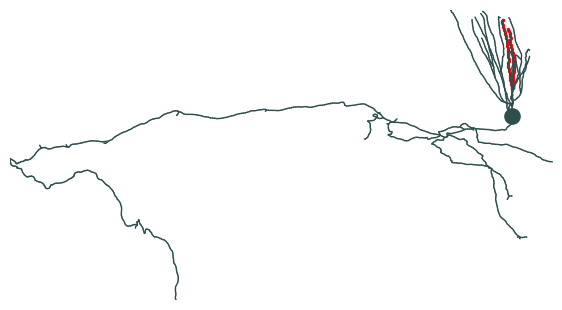

In [112]:
f, ax = plt.subplots(figsize=(7, 10))
skelplot.plot_tools.plot_skel(
    sk,
    line_width = 1,
    plot_soma = True,
    invert_y = True,
    x="x",
    y="y",
)

# Add the downstream vertices as red points (Note: this works for x-y plot orientation; select the columns appropriate to your skeleton orientation)
ax.scatter(sk.vertices[downstream_nodes][:,0], sk.vertices[downstream_nodes][:,1], c='r', s=2)

ax.spines['right'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.axis('off')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### Mask skeleton
    
One of the most useful features of the skeleton meshwork's is the ability to **mask** or select only parts of the skeleton to work with at a time. The function `apply_mask()` acts on the meshwork skeleton, and will apply in place if `apply_mask(in_place=True)`. 
    
**_Warning_**: be aware when setting a mask in place--mask operations are additive. To reset the mask completely, use `reset_mask(in_place=True)`
    
</div>

In [113]:
sk.reset_mask(in_place=True)

In [115]:
# Mask to select the downtream nodes
sk_masked = sk.apply_mask(downstream_nodes)

# Check that this masked skeleton matches the pathlength calculated above
sk_masked.path_length()

328004.6

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
### Mask Compartments
    
Critically, `apply_mask()` allows us to mask a neuron according to its compartment label: axon, dendrite, soma, etc. 
    
**Compartment label conventions** (from standardized swc files www.neuromorpho.org)
- 0 - undefined
- 1 - soma
- 2 - axon
- 3 - (basal) dendrite
- 4 - apical dendrite
- 5+ - custom
    
</div>

In [117]:
# Select the indices associated with the axon, and dendrites
axon_inds = sk.vertex_properties['compartment']==2
dendrite_inds = (sk.vertex_properties['compartment']==3) | (sk.vertex_properties['compartment']==4)

# create new skeleton that masks (selects) only the axon
sk_axon = sk.apply_mask(axon_inds)
print("Axon pathlength is : ", sk_axon.path_length() / 1_000, ' um')

Axon pathlength is :  4190.4435  um


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.3:</b>  Calculate the dendrite path length in microns. 
</div>

In [43]:
print("Dendrite pathlength is : ", , ' um')

outline from Sharmi

In [3]:
'''find some axon morphology attributes:
    branch points
    terminals
    roots?
    length
'''

In [7]:
''' do something similar for dendrites? exercise '''

' do something similar for dendrites? exercise '

In [9]:
''' plot branches '''

' plot branches '

In [10]:
''' histogram or statistics of some attribute - branch lengths?'''

' histogram or statistics of some attribute - branch lengths?'

In [11]:
''' computing the longest path '''

' computing the longest path '

In [12]:
'''computing the shortest path  - exercise '''

'computing the shortest path  - exercise '

In [13]:
''' plot the longest path overlaid'''

' plot the longest path '

In [ ]:
''' read 10 neurons
do a scatter of axon length to dendrite length'''

In [101]:
# directory functions; # note: skeleton.get() accepts a list of ids
skel_list = cv_em.cache.list_skeletons()
if skel_list:
    skel_list.remove('info') # remove the metadata file, which is not a valid skeleton

skel_list

# BD: this works locally, but does not work for this bucket. idk

[]